
🔎 Decision Tree Performance:
Accuracy : 0.713
Precision: 0.677
Recall   : 0.667

🔎 Random Forest Performance:
Accuracy : 0.776
Precision: 0.763
Recall   : 0.714


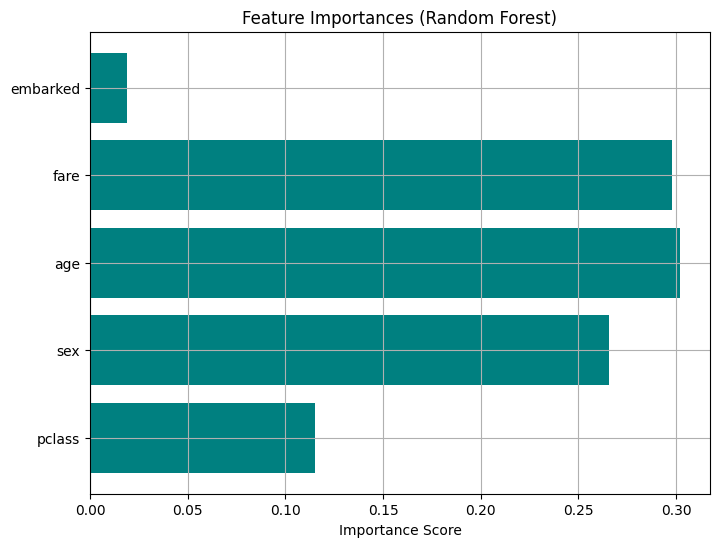

In [ ]:
# Task 8: Random Forest vs Decision Tree 

# Step 1: Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Step 2: Load and preprocess Titanic dataset
df = sns.load_dataset("titanic")
df = df.dropna(subset=["age", "embarked", "sex", "fare", "survived"])

df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = df[["pclass", "sex", "age", "fare", "embarked"]]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 4: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 5: Compare Metrics
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    print(f"\n🔎 {name} Performance:")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")

evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Step 6: Feature Importance Plot (Random Forest)
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importances (Random Forest)")
plt.grid(True)
plt.show()
